In [1]:
# Related to automobile,process industries, manufacturing plant,Similar topic project on NASA also.

In [2]:
# import the basic libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
original_data=pd.read_csv("component_failure_prediction.csv")
df=original_data.copy()
df.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


In [5]:
df.tail(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9900,9901,H39314,H,298.7,309.2,1449,42.3,182,0,No Failure
9901,9902,M24761,M,298.7,309.2,1423,48.9,187,0,No Failure
9902,9903,H39316,H,298.7,309.3,1402,45.3,190,0,No Failure
9903,9904,M24763,M,298.7,309.2,1437,45.7,195,0,No Failure
9904,9905,L57084,L,298.6,309.1,1537,35.7,198,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
df1=df.drop(["UDI","Product ID"],axis=1)

In [9]:
# variable in failure types 
df1["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [10]:
df1["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [11]:
df1["Target"].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [12]:
# there are five kind of failure.
# it is a highly imbalance data.

In [13]:
#lets change the name of the columns

In [14]:
#df2=df1.rename(mapper={"Air temperature [K]":"Air temperature"},axis=1)

In [15]:
#df2.head()

In [16]:
# lets check why there is a difference in failure number in failure type and target

In [17]:
df_failure=df1[df1["Target"]==1]
df_failure["Failure Type"].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [18]:
df_failure[df_failure["Failure Type"]=="No Failure"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [19]:
#drop the observation because we are not sure whether it is failure or No failure

In [20]:
id_possible_failure=df_failure[df_failure["Failure Type"]=="No Failure"].index
df1.drop(id_possible_failure,axis=0,inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9991 non-null   object 
 1   Air temperature [K]      9991 non-null   float64
 2   Process temperature [K]  9991 non-null   float64
 3   Rotational speed [rpm]   9991 non-null   int64  
 4   Torque [Nm]              9991 non-null   float64
 5   Tool wear [min]          9991 non-null   int64  
 6   Target                   9991 non-null   int64  
 7   Failure Type             9991 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 702.5+ KB


In [22]:
df_failure=df1[df1["Target"]==0]

df_failure["Failure Type"].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [23]:
df_failure[df_failure["Failure Type"]=="Random Failures"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [24]:
# we are not sure the above observation is failure or no failure because two 
#target variable indicate different results
# we should drop these observation

In [25]:
id_possible_failure=df_failure[df_failure["Failure Type"]=="Random Failures"].index
df1.drop(id_possible_failure,axis=0,inplace=True)

In [26]:
df1.shape[0]

9973

In [27]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [28]:
#lets see the pairplot correlation

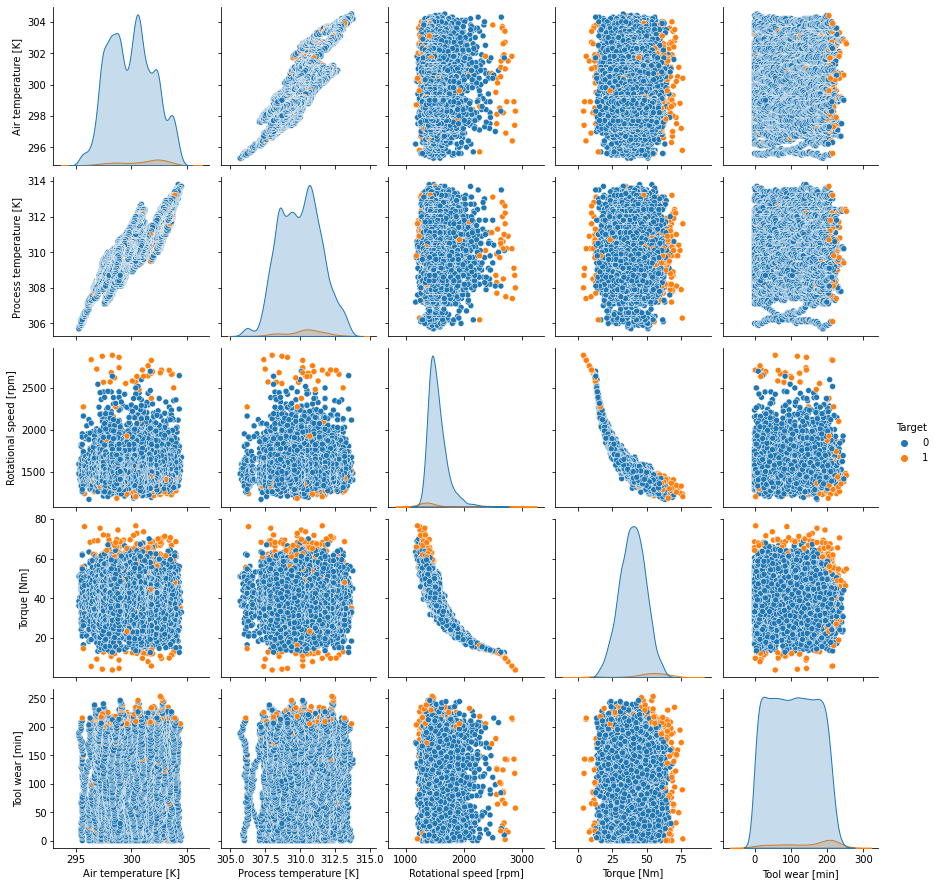

In [29]:
sns.pairplot(df1,hue="Target")

In [30]:
#observations
"""
(1)Torque and rotational speed are highly negative linear correlation 
(2)process temp and air temp are highly positive linear correlation
(3)Failure is only at the extreme low and high value of Torque and Rotational speed.
"""

'\n(1)Torque and rotational speed are highly negative linear correlation \n(2)process temp and air temp are highly positive linear correlation\n(3)Failure is only at the extreme low and high value of Torque and Rotational speed.\n'

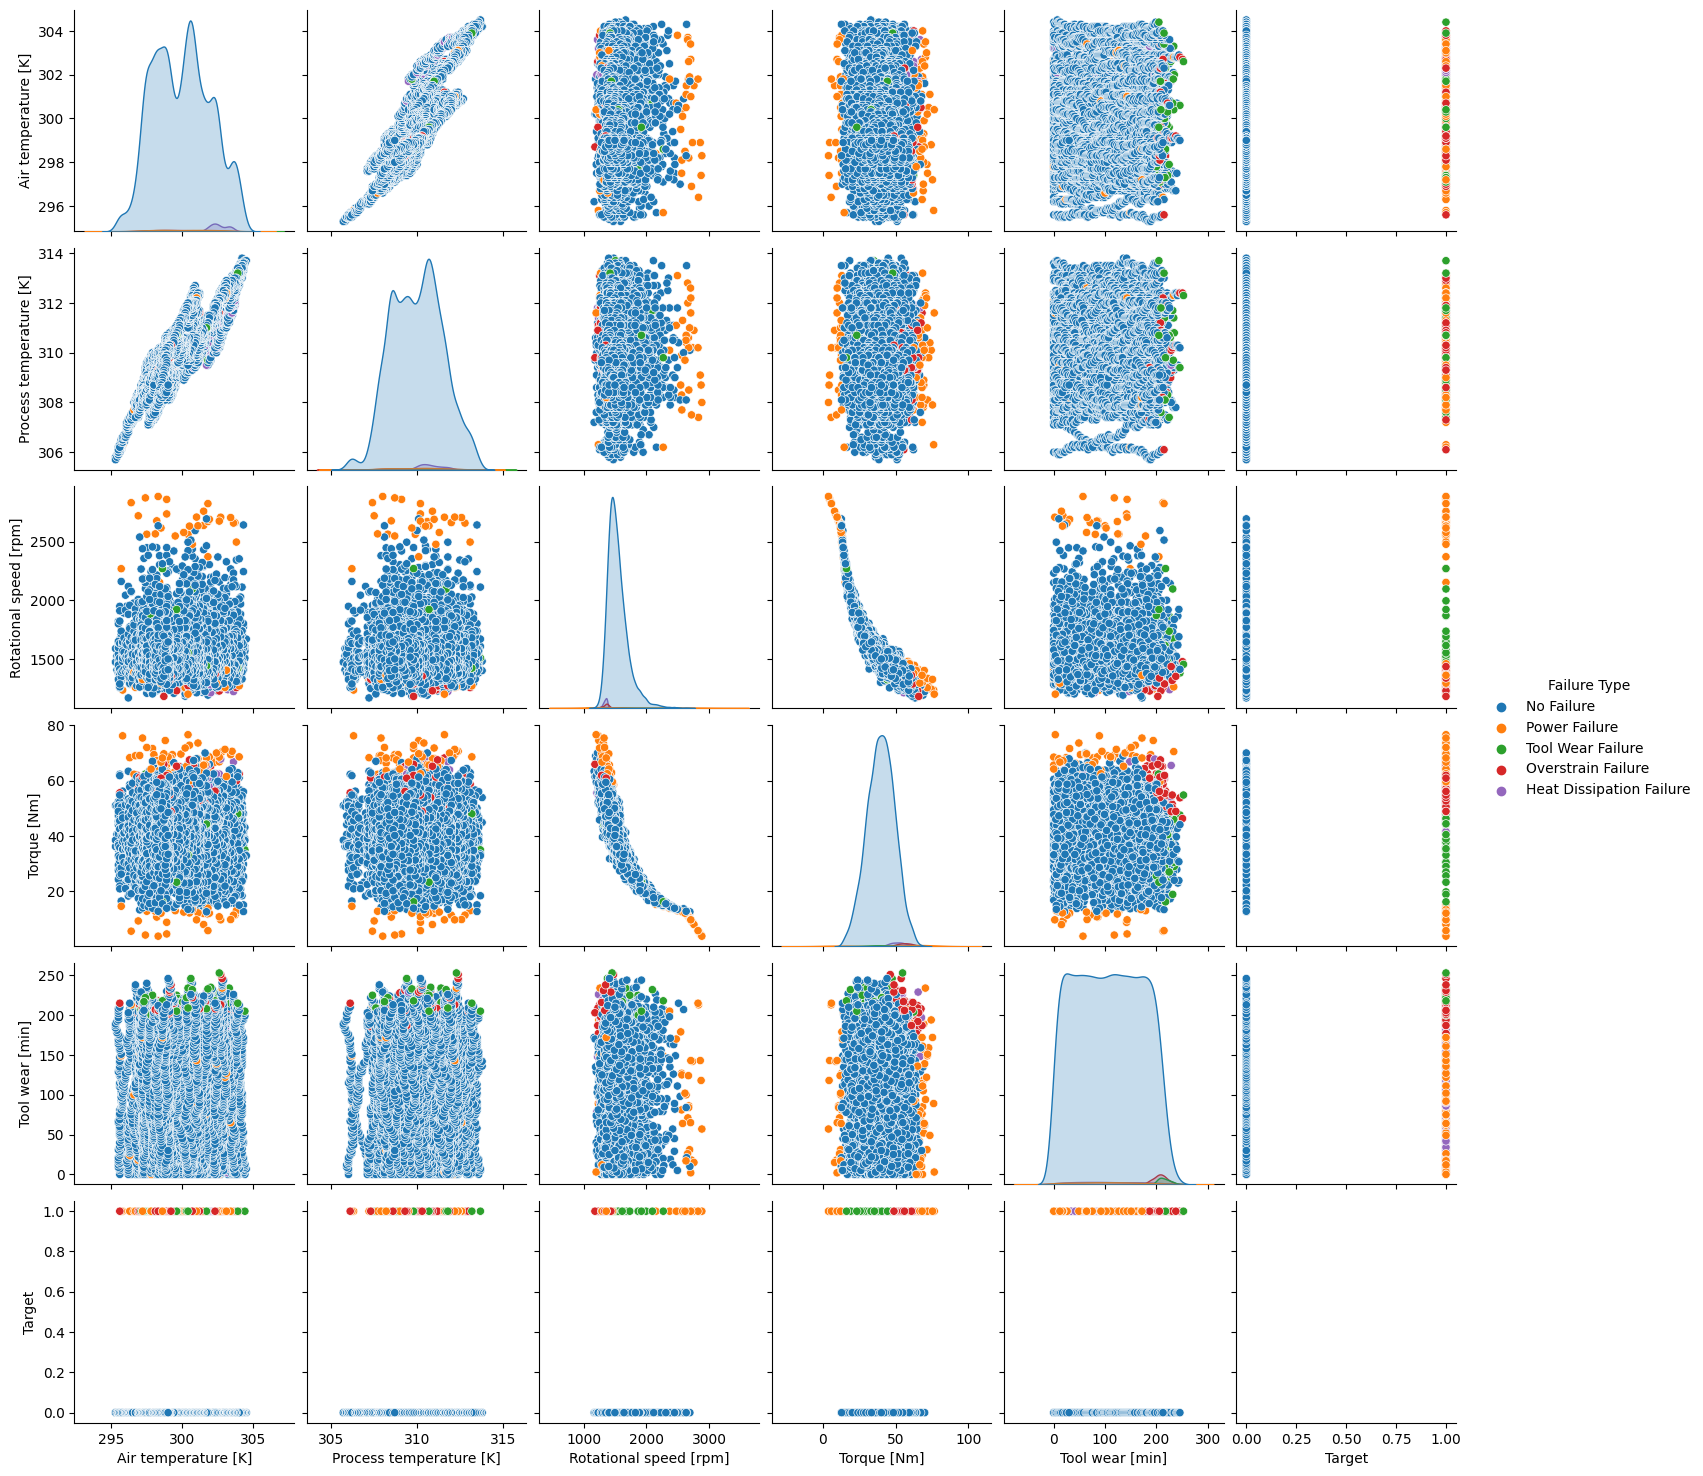

In [31]:
sns.pairplot(df1,hue="Failure Type")

In [32]:
#sns.pairplot(df1,x=df1["Rotational speed [rpm]"],y=df1["Torque [Nm]"],hue="Failure Type")

In [33]:
#correlation matrix
df1.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066
Process temperature [K],0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997
Rotational speed [rpm],0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042
Torque [Nm],-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420
Tool wear [min],0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337
Target,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000


<AxesSubplot:>

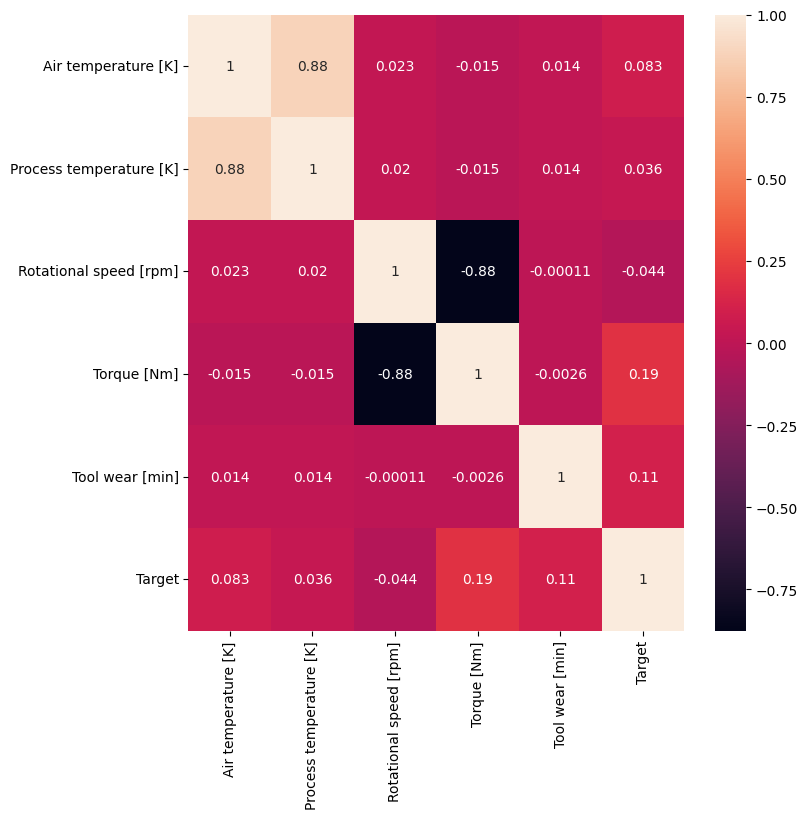

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True)

In [35]:
# Failure percentage of different quality component 

In [36]:
df1["Type"].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

Text(0.5, 1.0, 'percentage of component type')

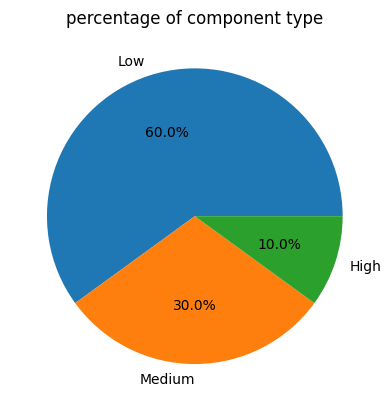

In [37]:
plt.pie(df1["Type"].value_counts(),labels=["Low","Medium","High"],autopct="%1.1f%%")
plt.title("percentage of component type")

In [38]:
df1["Target"].value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [39]:
# percentage of failure with respect to component quality type

In [40]:
df_product_type=df1[df1["Type"]=="L"]
df_product_type["Target"].value_counts()

0    5753
1     231
Name: Target, dtype: int64

In [41]:
df_product_type=df1[df1["Type"]=="M"]
df_product_type["Target"].value_counts()

0    2912
1      79
Name: Target, dtype: int64

In [42]:
df_product_type=df1[df1["Type"]=="H"]
df_product_type["Target"].value_counts()

0    978
1     20
Name: Target, dtype: int64

Text(0.5, 1.0, 'Percentage of failure wrt component quality L')

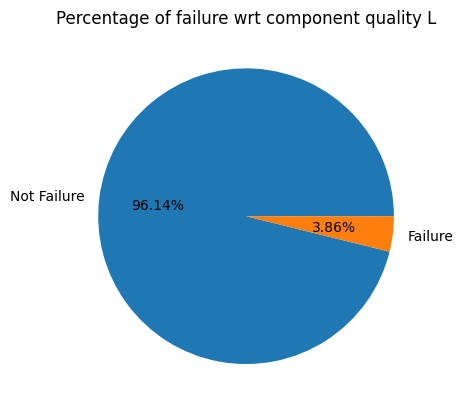

In [43]:
df_product_type=df1[df1["Type"]=="L"]
plt.pie(df_product_type["Target"].value_counts(),labels=["Not Failure","Failure"],autopct="%1.2f%%")
plt.title("Percentage of failure wrt component quality L")

Text(0.5, 1.0, 'Percentage of failure wrt component quality M')

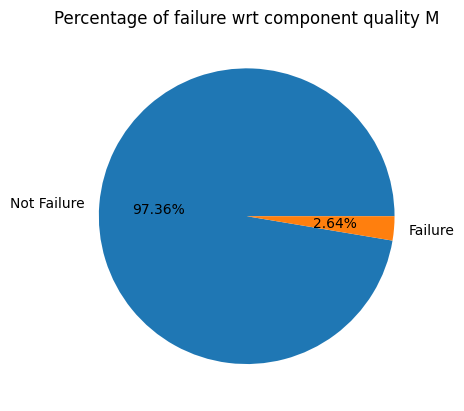

In [44]:
df_product_type=df1[df1["Type"]=="M"]
plt.pie(df_product_type["Target"].value_counts(),labels=["Not Failure","Failure"],autopct="%1.2f%%")
plt.title("Percentage of failure wrt component quality M")

Text(0.5, 1.0, 'Percentage of failure wrt component quality H')

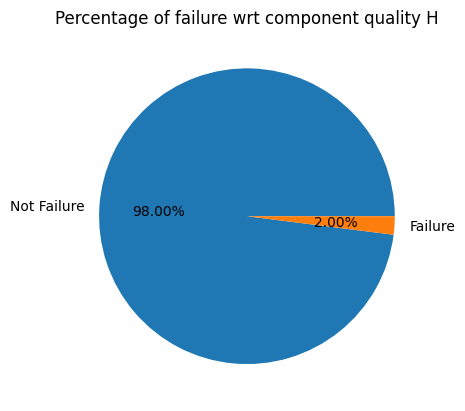

In [45]:
df_product_type=df1[df1["Type"]=="H"]
plt.pie(df_product_type["Target"].value_counts(),labels=["Not Failure","Failure"],autopct="%1.2f%%")
plt.title("Percentage of failure wrt component quality H")

In [46]:
# L type component have a higher failure wrt to M & H type. But it is not a alarming high.

In [47]:
# Feb_12th continue

In [48]:
df1["Failure Type"].value_counts(normalize=True)

No Failure                  0.966911
Heat Dissipation Failure    0.011230
Power Failure               0.009526
Overstrain Failure          0.007821
Tool Wear Failure           0.004512
Name: Failure Type, dtype: float64

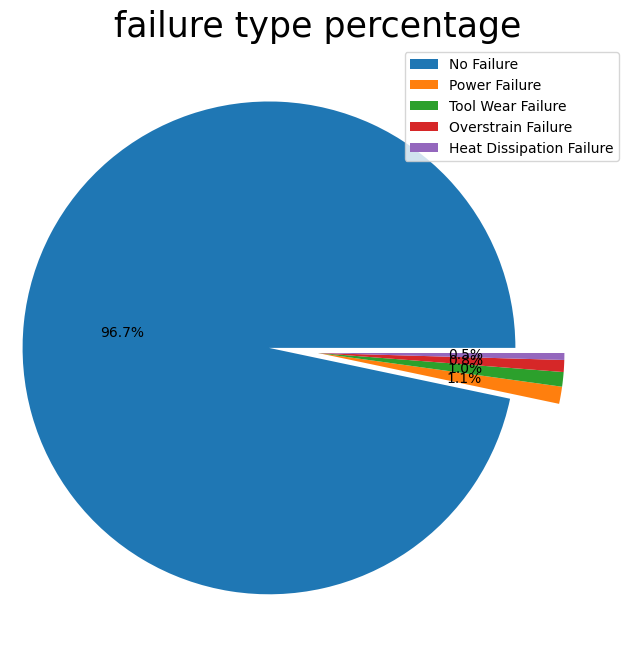

In [49]:
plt.figure(figsize=(8,8))
col_fail_type=df1["Failure Type"].unique().tolist()# failure types
plt.pie(df1["Failure Type"].value_counts(),explode=(0.2,0.0,0.0,0.0,0.0),autopct="%1.1f%%")
plt.title("failure type percentage",fontsize=25)
plt.legend(col_fail_type,fontsize=10)

In [50]:
df1["Failure Type"].unique().tolist()

['No Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Overstrain Failure',
 'Heat Dissipation Failure']

In [51]:
df1["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Heat Dissipation Failure'], dtype=object)

In [52]:
# lets draw the scatter plot of different failure type

In [53]:
# rotational speed and torque are the most imp failure factor 

In [54]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


Text(0.5, 1.0, 'only failure class')

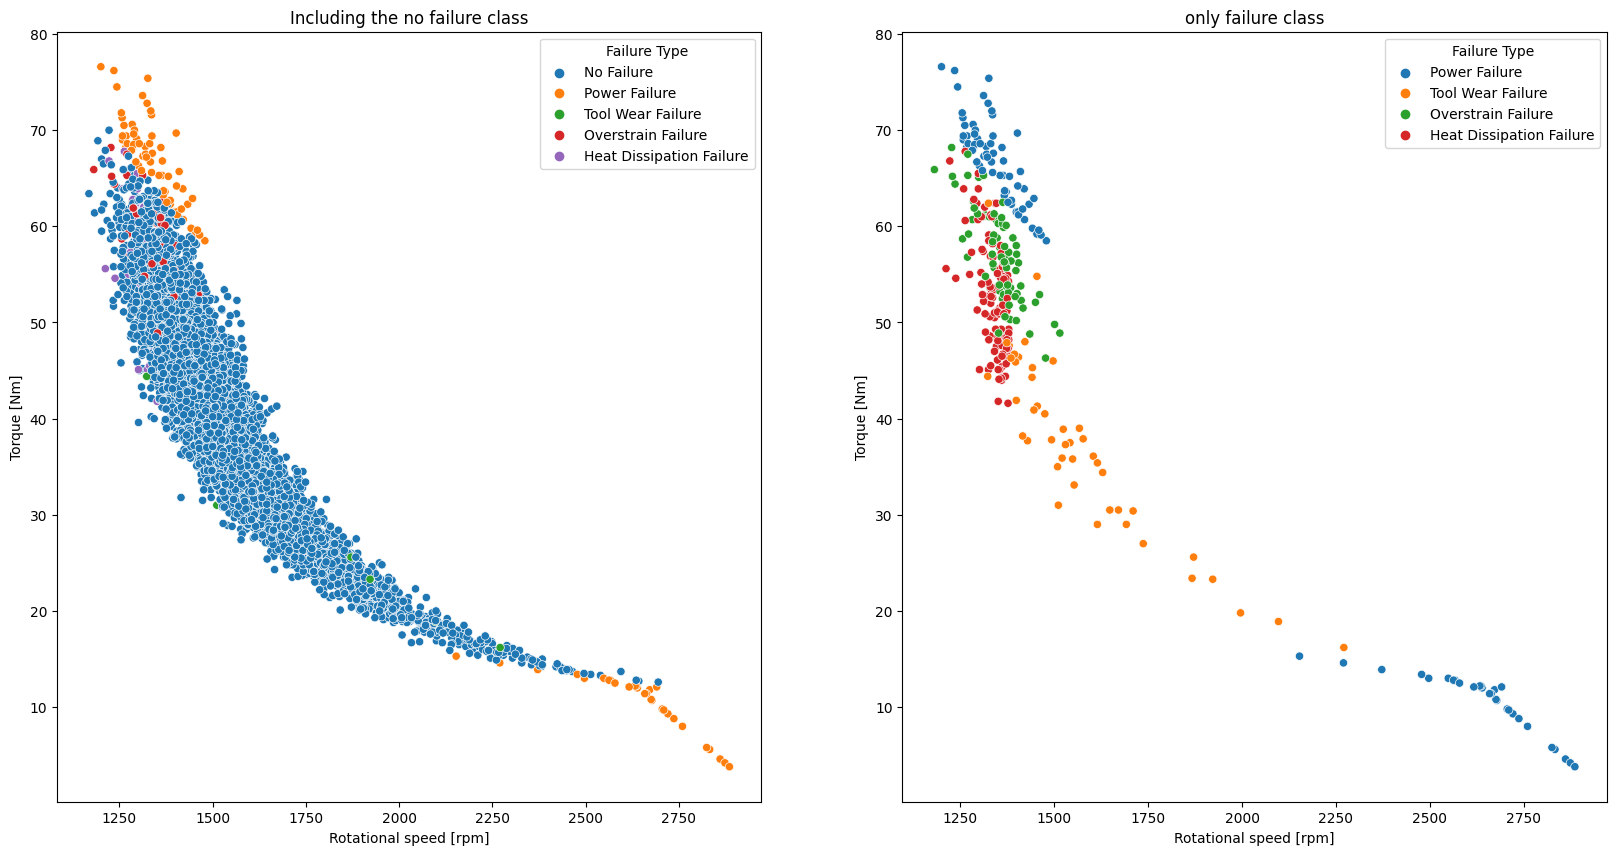

In [55]:
fig,ax=plt.subplots(1,2,figsize=[20,10])
sns.scatterplot(data=df1,x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type",ax=ax[0])
sns.scatterplot(data=df1[df1["Target"]==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type",ax=ax[1])
ax[0].set_title("Including the no failure class")
ax[1].set_title("only failure class")

In [56]:
# please write the interpretation obtained from the above scatterplot

In [57]:
# preprocessing finding the outliers

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

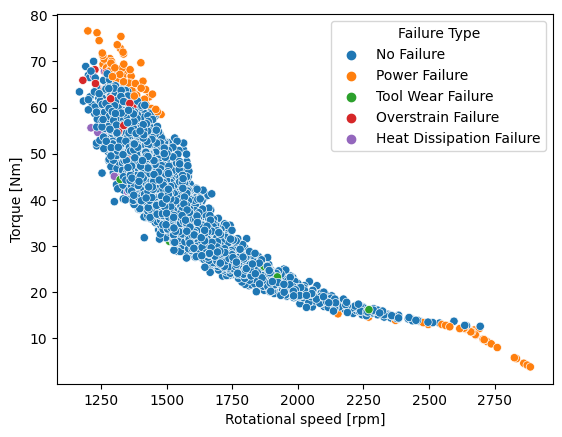

In [58]:
sns.scatterplot(data=df1,x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

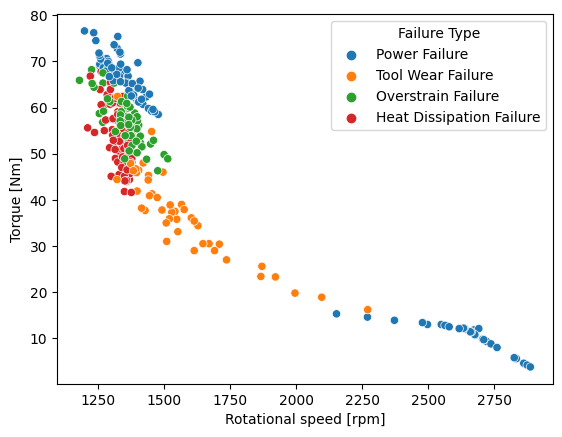

In [59]:
sns.scatterplot(data=df1[df1["Target"]==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

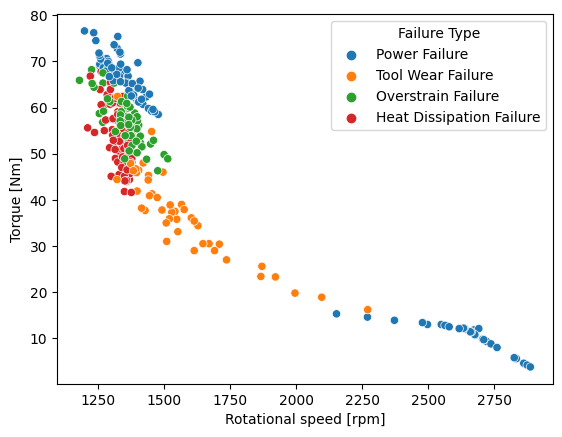

In [60]:
sns.scatterplot(data=df1[df1["Target"]==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

In [61]:
# preprocessing finding the outliers

<AxesSubplot:xlabel='Rotational speed [rpm]'>

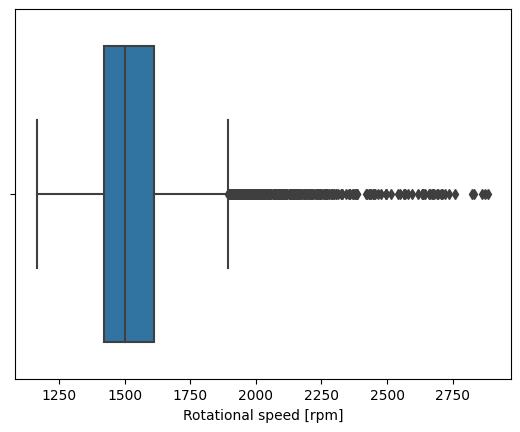

In [62]:
sns.boxplot(data=df1,x="Rotational speed [rpm]")

<AxesSubplot:xlabel='Torque [Nm]'>

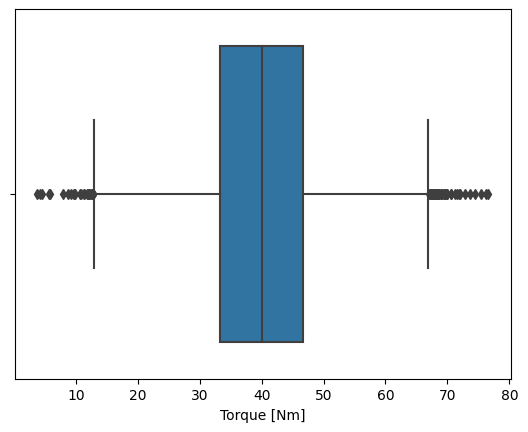

In [63]:
sns.boxplot(data=df1,x="Torque [Nm]")

In [64]:
df1.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 959.3+ KB


In [66]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [67]:
df1["Failure Type"].unique().tolist()

['No Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Overstrain Failure',
 'Heat Dissipation Failure']

In [68]:
df1["Type"].unique().tolist()

['M', 'L', 'H']

In [69]:
#label encoding or mapping approach

In [70]:
df1["Type"]=df1["Type"].map({"L":0,"M":1,"H":2})

In [71]:
df1["Failure Type"]=df1["Failure Type"].map({'No Failure':0,'Power Failure':1,'Tool Wear Failure':2,
 'Overstrain Failure':3,'Heat Dissipation Failure':4})

In [72]:
df1.head(100)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...
95,1,299.0,309.0,1351,52.2,44,0,0
96,1,299.0,309.0,1575,35.3,47,0,0
97,1,298.9,308.9,1750,29.9,50,0,0
98,0,298.9,308.8,1529,32.7,53,0,0


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   int64  
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 959.3 KB


In [74]:
#  split the data into dependent and independent variable

In [75]:
X=df1.drop(["Target","Failure Type"],axis=1)

In [76]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [77]:
# we know there is outlier in columns rotational speed and torque
# we prefer the robust scaler scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [79]:
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1.0,-0.62500,-0.652174,0.253968,0.200000,-0.990826
1,0.0,-0.59375,-0.608696,-0.502646,0.459259,-0.963303
2,0.0,-0.62500,-0.695652,-0.026455,0.688889,-0.944954
3,0.0,-0.59375,-0.652174,-0.370370,-0.044444,-0.926606
4,0.0,-0.59375,-0.608696,-0.502646,-0.007407,-0.908257


In [80]:
# we are working on Target column as dependent variable

In [81]:
Y=df1["Target"]# binary class

In [82]:
# data is highly imbalance , stratified split is important

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.80,stratify=Y,random_state=101)
#X_eval,X_test1,Y_eval,Y_test1=train_test_split(X_test,Y_test,train_size=0.50,random_state=105)

In [85]:
print("original data \n",df1["Target"].value_counts(normalize=True))
print("training data \n",Y_train.value_counts(normalize=True))
print("testing data \n",Y_test.value_counts(normalize=True))

original data 
 0    0.966911
1    0.033089
Name: Target, dtype: float64
training data 
 0    0.966909
1    0.033091
Name: Target, dtype: float64
testing data 
 0    0.966917
1    0.033083
Name: Target, dtype: float64


In [86]:
# model building 

In [87]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [88]:
rf=RandomForestClassifier()
bag=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [89]:
# random forest

In [90]:
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
accuracy_score(Y_test,Y_pred_rf)

0.9824561403508771

In [93]:
confusion_matrix(Y_test,Y_pred_rf)

array([[1919,   10],
       [  25,   41]], dtype=int64)

In [94]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.80      0.62      0.70        66

    accuracy                           0.98      1995
   macro avg       0.90      0.81      0.85      1995
weighted avg       0.98      0.98      0.98      1995



In [95]:
# Bagging algorithm

In [96]:
bag.fit(X_train,Y_train)
Y_pred_bag=bag.predict(X_test)
accuracy_score(Y_test,Y_pred_bag)


0.9819548872180451

In [97]:
confusion_matrix(Y_test,Y_pred_bag)


array([[1921,    8],
       [  28,   38]], dtype=int64)

In [98]:
print(classification_report(Y_test,Y_pred_bag))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.83      0.58      0.68        66

    accuracy                           0.98      1995
   macro avg       0.91      0.79      0.83      1995
weighted avg       0.98      0.98      0.98      1995



In [99]:
# please find accuracy of other algorithm

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [101]:
from sklearn.model_selection import cross_validate

In [102]:
for model in [rf,bag,svc,dt,knn]:
    print("=========="*5)
    print('Performance of ', model)
    print("=========="*5)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    scoring = ["f1_macro", "precision_macro", "recall_macro"]
    cross_val_scores = cross_validate(model, X, Y, scoring=scoring)
    roc_auc_test_cv = round(cross_val_score(model, X, Y, cv=cv, n_jobs=-1, scoring="roc_auc").mean(),4)
    f1_test_cv = round(cross_val_scores["test_f1_macro"].mean(),4)
    precision_test_cv = round(cross_val_scores["test_precision_macro"].mean(),4)
    recall_test_cv = round(cross_val_scores["test_recall_macro"].mean(),4)
       
    
    # Print metrics
    print(f'Cross val roc auc test data: {roc_auc_test_cv}')
    print(f'Cross val macro f1 score test data: {round(cross_val_scores["test_f1_macro"].mean(),4)}')
    print(f'Cross val macro precision score test data: {round(cross_val_scores["test_precision_macro"].mean(),4)}')
    print(f'Cross val macro recall score test data: {round(cross_val_scores["test_recall_macro"].mean(),4)}')
   # print()

Performance of  RandomForestClassifier()
Cross val roc auc test data: 0.9755
Cross val macro f1 score test data: 0.6859
Cross val macro precision score test data: 0.8048
Cross val macro recall score test data: 0.6915
Performance of  BaggingClassifier()
Cross val roc auc test data: 0.9278
Cross val macro f1 score test data: 0.7082
Cross val macro precision score test data: 0.7892
Cross val macro recall score test data: 0.7296
Performance of  SVC()
Cross val roc auc test data: 0.9193
Cross val macro f1 score test data: 0.4945
Cross val macro precision score test data: 0.5335
Cross val macro recall score test data: 0.5015
Performance of  DecisionTreeClassifier()
Cross val roc auc test data: 0.8431
Cross val macro f1 score test data: 0.6989
Cross val macro precision score test data: 0.7317
Cross val macro recall score test data: 0.7547
Performance of  KNeighborsClassifier()
Cross val roc auc test data: 0.7667
Cross val macro f1 score test data: 0.6491
Cross val macro precision score test d

In [103]:
# please write the interpretation

In [104]:
# Balancing the data set

In [105]:
# pl remember only balance the training dataset

In [106]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [107]:
smote=SMOTE(random_state=50,n_jobs=-1)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [108]:
# apply random forest on balance dataset

In [109]:
rf_smote=rf.fit(X_train_smote,Y_train_smote)
Y_RF_pred_smote=rf_smote.predict(X_test)

In [110]:
accuracy_score(Y_test,Y_RF_pred_smote)

0.9704260651629073

In [111]:
confusion_matrix(Y_test,Y_RF_pred_smote)

array([[1885,   44],
       [  15,   51]], dtype=int64)

In [112]:
print(classification_report(Y_test,Y_RF_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.54      0.77      0.63        66

    accuracy                           0.97      1995
   macro avg       0.76      0.87      0.81      1995
weighted avg       0.98      0.97      0.97      1995



In [113]:
Y_RF_pred_smote

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# after balancing the data we can try the performance of other algorithm
"""
rf=RandomForestClassifier()
bag=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()


"""

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
for model in[rf,bag,svc,dt,knn]:
    print("=========="*6)
    print("performance of", model)
    print("=========="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    
    # printing the metrics
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("Accuracy score \n" ,AS)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    print("ROC AUC \n" ,ROC)
    print("=========="*3)

performance of RandomForestClassifier()
Confusion matrix 
 [[1921    8]
 [  25   41]]
Accuracy score 
 0.9834586466165414
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.84      0.62      0.71        66

    accuracy                           0.98      1995
   macro avg       0.91      0.81      0.85      1995
weighted avg       0.98      0.98      0.98      1995

ROC AUC 
 0.8085324473349357
performance of BaggingClassifier()
Confusion matrix 
 [[1922    7]
 [  23   43]]
Accuracy score 
 0.9849624060150376
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.86      0.65      0.74        66

    accuracy                           0.98      1995
   macro avg       0.92      0.82      0.87      1995
weighted avg       0.98      0.98      0.98      1995

ROC AUC 
 0.8239431641453414
p

In [139]:
# lets balance the dataset
from imblearn.over_sampling import SMOTE,RandomOverSampler,BorderlineSMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [140]:
smote=SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()

In [141]:
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
for model in[rf,bag]:
    print("=========="*6)
    print("after balancing performance of", model)
    print("=========="*6)
    for balancer in[smote,adasyn,over,border]:
        X_train1,Y_train1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train1,Y_train1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
    
    # printing the metrics
        print(model,"using balancer:- ", balancer)
        print("=========="*6)
        print("=========="*6)
        print("Confusion matrix \n" ,cm)
        print("=========="*3)
        print("Accuracy score \n" ,AS)
        print("=========="*3)
        print("CLASSIFICATION REPORT \n" ,CR)
        print("=========="*3)
        print("ROC AUC \n" ,ROC)
        print("=========="*3)

after balancing performance of RandomForestClassifier()
RandomForestClassifier() using balancer:-  SMOTE()
Confusion matrix 
 [[1883   46]
 [  17   49]]
Accuracy score 
 0.968421052631579
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.52      0.74      0.61        66

    accuracy                           0.97      1995
   macro avg       0.75      0.86      0.80      1995
weighted avg       0.98      0.97      0.97      1995

ROC AUC 
 0.8592888449031528
RandomForestClassifier() using balancer:-  ADASYN()
Confusion matrix 
 [[1882   47]
 [  15   51]]
Accuracy score 
 0.9689223057644111
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.52      0.77      0.62        66

    accuracy                           0.97      1995
   macro avg       0.76      0.87      0.80      1995
we

In [ ]:
# please do parameter tunning approach OPTIMIZATION

In [ ]:
# GridSearchCV and RandomizedSearchCV 

In [144]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [142]:
rf.get_params()# it return the default parameters 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [145]:
grid_param_rf={"n_estimators":np.arange(10,160,10),
              "max_depth":np.arange(10,110,10),
              "min_samples_split":[2,5,10,20]}

In [148]:
random_cv=RandomizedSearchCV(rf,grid_param_rf,n_iter=20,n_jobs=-1,cv=2)

In [149]:
%%time
random_cv.fit(X_train,Y_train)
print("best parameters are", random_cv.best_params_)

best parameters are {'n_estimators': 110, 'min_samples_split': 5, 'max_depth': 70}
Wall time: 20.2 s


In [151]:
grid_cv=GridSearchCV(rf,grid_param_rf,n_jobs=-1,cv=2)

In [152]:
%%time
grid_cv.fit(X_train,Y_train)
print("best parameters are", grid_cv.best_params_)

best parameters are {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 40}
Wall time: 5min 24s


In [ ]:
rf=RandomForestClassifier()
bag=BaggingClassifier()

In [143]:
bag.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# working on the multiclass failure type dependent variable

In [153]:
Y_ftype=df1["Failure Type"]

In [155]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_scaled,Y_ftype,train_size=0.8,stratify=Y_ftype,random_state=100)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
for model in[rf,bag,svc,dt,knn]:
    print("=========="*6)
    print("performance of", model)
    print("=========="*6)
    abc=model.fit(X_train1,Y_train1)
    y_pred=abc.predict(X_test1)
    cm=confusion_matrix(Y_test1,y_pred)
    AS=accuracy_score(Y_test1,y_pred)
    CR=classification_report(Y_test1,y_pred)
    #ROC=roc_auc_score(Y_test1,y_pred)
    
    # printing the metrics
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("Accuracy score \n" ,AS)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

performance of RandomForestClassifier()
Confusion matrix 
 [[1926    3    0    0    0]
 [   6   12    0    1    0]
 [   8    0    0    1    0]
 [   9    1    0    6    0]
 [   8    0    0    0   14]]
Accuracy score 
 0.981453634085213
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.75      0.63      0.69        19
           2       0.00      0.00      0.00         9
           3       0.75      0.38      0.50        16
           4       1.00      0.64      0.78        22

    accuracy                           0.98      1995
   macro avg       0.70      0.53      0.59      1995
weighted avg       0.98      0.98      0.98      1995

performance of BaggingClassifier()
Confusion matrix 
 [[1923    2    3    0    1]
 [   4   15    0    0    0]
 [   8    0    0    1    0]
 [   8    1    0    7    0]
 [   0    0    0    0   22]]
Accuracy score 
 0.9859649122807017
CLASSIFICATION REPORT

In [ ]:
df1["Target"].value_counts(normalize=True)